In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [22]:
car_data = pd.read_csv('car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
car_data.shape

(301, 9)

In [28]:
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Seller_Type
0    239
1     60
2      2
Name: count, dtype: int64
Transmission
0    239
1     60
2      2
Name: count, dtype: int64


In [26]:
car_data['Fuel_Type'] = car_data['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2})
car_data['Seller_Type'] = car_data['Fuel_Type'].replace({'Dealer':0,'Individual':1})
car_data['Transmission'] = car_data['Fuel_Type'].replace({'Manual':0,'Automatic':1})

In [27]:
car_data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,1,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,1,1,0
5,vitara brezza,2018,9.25,9.83,2071,1,1,1,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,1,1,0
8,ciaz,2016,8.75,8.89,20273,1,1,1,0
9,ciaz,2015,7.45,8.92,42367,1,1,1,0


In [35]:
data = car_data.drop(columns=['Selling_Price','Car_Name'])
label = car_data['Selling_Price']

In [36]:
data.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,1,1,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,1,1,0


In [37]:
label.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [44]:
data_train,data_test,label_train,label_test = train_test_split(data,label,test_size = 0.1,random_state = 2)
print(data.shape, data_train.shape,data_test.shape)
print(label.shape, label_train.shape,label_test.shape)

(301, 7) (270, 7) (31, 7)
(301,) (270,) (31,)


In [46]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(data_train,label_train)

LinearRegression()

In [52]:
training_data_prediction = lin_reg_model.predict(data_train)
training_accuracy = metrics.r2_score(training_data_prediction,label_train)
print("R squared error on training data is ",training_accuracy)

testing_data_prediction = lin_reg_model.predict(data_test)
testing_accuracy = metrics.r2_score(testing_data_prediction,label_test)
print("R squared error on testing data is ",testing_accuracy)

R squared error on training data is  0.8472090406933322
R squared error on testing data is  0.7479854758477908


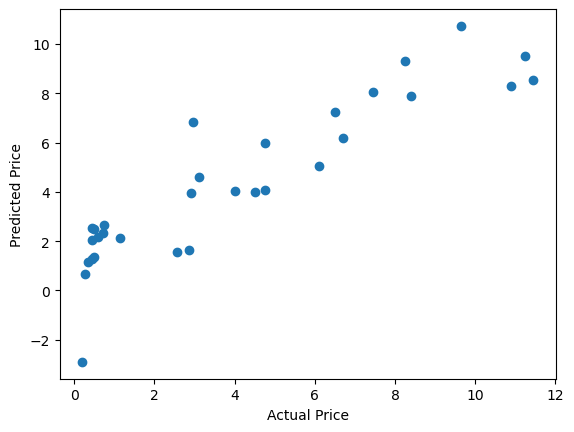

In [53]:
plt.scatter(label_test,testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()